In [553]:
import numpy as np
import matplotlib.pyplot as plt
import random

First we need to generate the Training Data for fitting a polynomial hence I design a function *polynomialData()*. There are 2 arguments for this function:
1. Degree of the polynomial
2. Parameters for the polynomial required in the form of a list Eg- For Ax^2+Bx+C it will be [C,B,A]

Syntax for this is therefore:

**polynomialData(Degree of polynomial,List containing the parameters in required format)**

The function **Returns the Training Data in the form of a tuple as (input X,output Y)**

In [554]:
def polynomialData(N,parameters):
    x=[]
    y=[]
    for i in range(-10,11):
        x.append(i)
       
    X_train=np.array(x)

    _=np.full(X_train.shape,1)

    m = X_train.shape[0]

    X=np.full([m, N+1],1)

    for i in range(1,N+1):
        X[:,i]=X_train**i


    m, n = X.shape
    thet=np.array(parameters)
    
    Y=(X@thet+((10**(N))*np.random.rand(m))) 

    return (X,Y)


After we have generated the Data we need to Train our parameters with the given Training Data. Hence I have defined a function
**Regression()** for the present purpose. This function contains 5 arguments as follows-

1. Train_Data - Take the training data as a tuple (X,Y)
2. N - Takes the degree/power with respect to which the Cost/Loss Function will be raised. Eg. **For a square loss function N=2**
3. alpha - Learning Rate for the Problem
4. max_iter - Maximum number of iterations

The Function does the following tasks:
1. Trains the parameters according to our Data

2. Plots a graph between the Cost Function and Number of Iterations 

3. Returns the trained parameters

In [579]:
def Regression(Train_Data, N, alpha, max_iter):
    
    X, Y =Train_Data
    m, n = X.shape
    Theta=np.random.rand(n)
    
    C=[]
    i=[]
    it=0
    
    
    #Training Loop Starts   
    while True:
        it=it+1
        pY = X@Theta   #prediction of Y
        
        _=pY-Y
        sq=abs(_**N)
        Cost=sq.sum()/(N*m)  #Calculating the cost function(Average Loss)
        
        if N%2!=0:
            deriv0=(_**(N-1))*(np.sign(_))/m
        else:
            deriv0=(_**(N-1))/m
            
        gradient=X.T@(deriv0)  # Calculating the Gradient Vector
    
        Theta=Theta-alpha*gradient # Gradient Descent
    
        C.append(Cost)
        i.append(it)
            
        if Cost>10**20:
            print("Diverging")
            break
            
        elif it>max_iter:
            print("Number of iterations exceeded",max_iter,"\nMinimum Cost obtained is:",C[-1])
            print("Minimum Loss Obtained is",C[-1]/C[0]*100,"% of the Initial Loss")
            break
     #Training Loop Ends       
            
    plt.plot(np.array(i),np.array(C))     
    plt.scatter(np.array(i),np.array(C)) 
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost/Loss Function")
    return Theta

checkPlot() is a simple function with **Train_Data**, **Theta** as parameters and plots the scatter of **TrainedData** along with the **Trained Curve** with **Theta** as parameter

In [563]:
def checkPlot(Train_Data,Theta):
    X, Y=Train_Data
    plt.scatter(X[:,1], Y, color="Red", label="Training Data")
    plt.plot(X[:,1], X@Theta, color="Green", label="Fitted Curve")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

**Linear Regression model using (a.) and (b.) as criterion**

**Generating Linear Data:-**

In [564]:
train_Data1=polynomialData(1,[1,2]) #Generates Data for Linear polynomial 2x+1 with random noise added to it also plots the data

**Training the Parameters using (a.)-**

Number of iterations exceeded 100000 
Minimum Cost obtained is: 6.2846381945204275
Minimum Loss Obtained is 1.9025839208051347 % of the Initial Loss


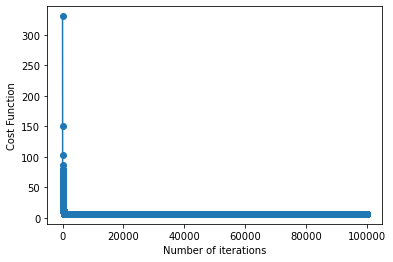

In [565]:
theta1=Regression(train_Data1,3,0.001,100000)

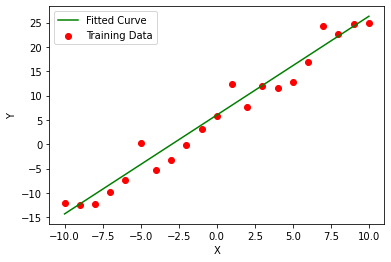

In [566]:
checkPlot(train_Data1,theta1)

**Training the Parameters using (b.)-**

Number of iterations exceeded 100000 
Minimum Cost obtained is: 1.786818623709728
Minimum Loss Obtained is 19.68625167205155 % of the Initial Loss


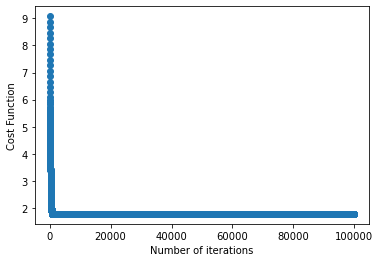

In [567]:
theta2=Regression(train_Data1,1,0.01,100000)

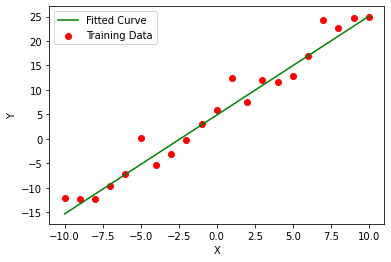

In [568]:
checkPlot(train_Data1,theta2)

**Polynomial Regression (2nd degree polynomial) model using (c.) and (d.) as criterion**

**Generating the Quadratic Data:**

In [569]:
train_Data2=polynomialData(2,[5,3,7]) #Generates the Quadratic training data for the eqn 7x^2+3x+5 with some random noise added

**Training the Parameters using (c.)-**

Number of iterations exceeded 100000 
Minimum Cost obtained is: 2494305.793114259
Minimum Loss Obtained is 0.020149070311122452 % of the Initial Loss


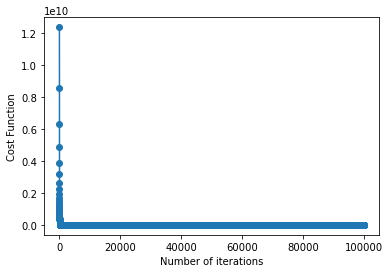

In [570]:
theta3=Regression(train_Data2,4,10**-10,100000)

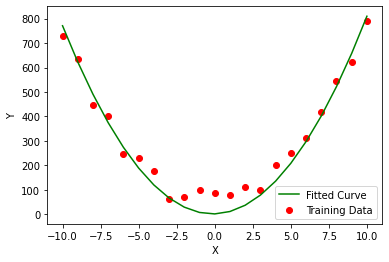

In [571]:
checkPlot(train_Data2, theta3)

**Training the Parameters using (d.)-**

Number of iterations exceeded 100000 
Minimum Cost obtained is: 1274189267167.508
Minimum Loss Obtained is 5.3952126436626415e-05 % of the Initial Loss


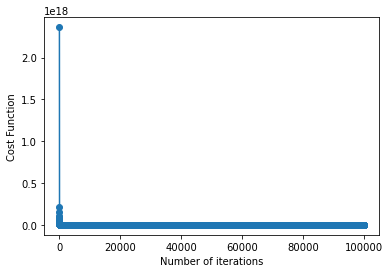

In [577]:
theta4=Regression(train_Data2,7,10**-18,100000)


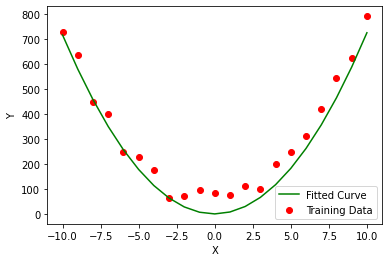

In [578]:
checkPlot(train_Data2,theta4)